In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1(a)
made a stochastic matrix P.

In [2]:
P = np.matrix([[0.2, 0.7, 0.1], 
              [0.2, 0.5, 0.3], 
              [0.2, 0.4, 0.4]])
P

matrix([[0.2, 0.7, 0.1],
        [0.2, 0.5, 0.3],
        [0.2, 0.4, 0.4]])

# 1(b)

In [12]:
X = [np.matrix([1, 0, 0])]
for i in range(10):
    X.append(X[-1]*P)

print('The multiplication with matrix P converges to a certain distribution', end='\n\n')
for i in range(10):
    print(f"X_{i}: ", X[i])

The multiplication with matrix P converges a certain distribution

X_0:  [[1 0 0]]
X_1:  [[0.2 0.7 0.1]]
X_2:  [[0.2  0.53 0.27]]
X_3:  [[0.2   0.513 0.287]]
X_4:  [[0.2    0.5113 0.2887]]
X_5:  [[0.2     0.51113 0.28887]]
X_6:  [[0.2      0.511113 0.288887]]
X_7:  [[0.2       0.5111113 0.2888887]]
X_8:  [[0.2        0.51111113 0.28888887]]
X_9:  [[0.2        0.51111111 0.28888889]]


# 2(a)

We should solve this equation.
$$
\pi^T_\infty P = \pi^T_\infty
$$

We set
$$
\pi^T_\infty = (a, b, c)
$$

And then the equation is written as

$$
(a, b, c)\begin{pmatrix} 
  0.2 & 0.7 & 0.1 \\
  0.2 & 0.5 & 0.3 \\
  0.2 & 0.4 & 0.4
\end{pmatrix} = (a, b, c)
$$

Expand this multiplication, then

$$
\begin{equation*}
   \begin{cases}
      0.2a + 0.2b + 0.2c = a \\
      0.7a + 0.5b + 0.4c = b \\
      0.1a + 0.3b + 0.4c = c
   \end{cases}
\end{equation*}   \;\;\cdots A
$$
It goes without saying that the sum of probability equals 1, so
$$
a + b + c = 1 \cdots B
$$

From A and B, we get
$$
\begin{equation*}
a = 2 \\
b = \frac{23}{45} = (0.5\dot{1}) \\
c = \frac{13}{45} = (0.2\dot{8})
\end{equation*}
$$

In [4]:
# check the result with codes
Q = [1, 0, 0]
pi_inf = Q @ (P**100) # As an example, perform multiplication 100 times
print('pi_infinity: ', pi_inf)

pi_infinity:  [[0.2        0.51111111 0.28888889]]


# 2(b)

In [5]:
def cal_length(pi_i):
    '''return the norm between provided pi and pi_inf'''
    pi_inf = np.matrix([0.2, 0.51111111, 0.28888889])
    return np.linalg.norm(pi_i - pi_inf)

In [6]:
prob_results = []
norm_results = []
for i in range(1, 6):
    # set pi_0 with random numbers
    pi = np.random.random(3)
    pi = pi / np.sum(pi)
    prob_df = pd.DataFrame(pi.reshape(1,3))
    len_result = [cal_length(pi)]
    for j in range(5):
        pi = pi @ P
        prob_df = pd.concat([prob_df, pd.DataFrame(pi.reshape(1,3))], axis=0)
        len_result.append(cal_length(pi))
    prob_results.append(prob_df)
    norm_results.append(len_result)

From the graph below, we can see that the probability of entering each node converges to the values we got in 2(a).


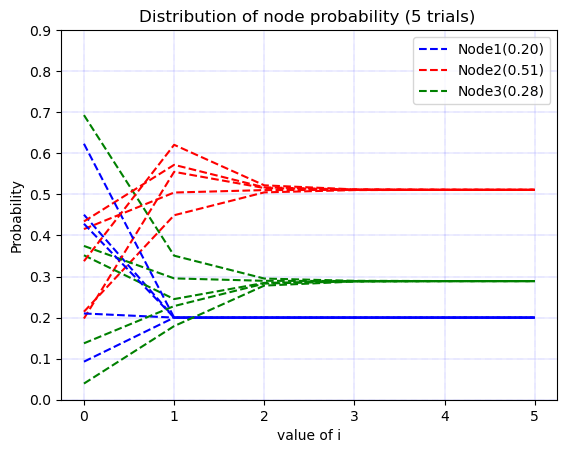

In [7]:
# make graph of distribution transition
for i in range(5):
    df = prob_results[i]
    plt.plot(list(range(0, 6)), df[0], "--",  color='b', label='Node1(0.20)')
    plt.plot(list(range(0, 6)), df[1], "--",  color='r', label='Node2(0.51)')
    plt.plot(list(range(0, 6)), df[2], "--",  color='g', label='Node3(0.28)')
    if i == 0:
        plt.legend() # show legend only once

print('From the graph below, we can see that the probability of entering each node converges to the values we got in 2(a).')

plt.xlabel('value of i')
plt.ylabel('Probability')
plt.yticks(np.arange(0, 1.0, 0.1))
plt.title('Distribution of node probability (5 trials) ')
plt.grid(color='b', linestyle=':', linewidth=0.3)
plt.show()

From the graph below shows that as i increases, norm approaches zero.


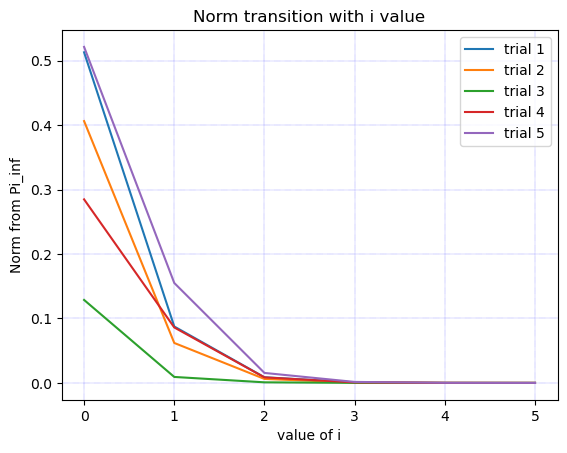

In [8]:
# make graph of norm
print('From the graph below shows that as i increases, norm approaches zero.')

for i in range(5):
    plt.plot(list(range(0, 6)), norm_results[i], label=f'trial {i+1}')
plt.xticks(list(range(0, 6)))
plt.title('Norm transition with i value')
plt.xlabel('value of i')
plt.ylabel('Norm from Pi_inf')
plt.legend()
plt.grid(color='b', linestyle=':', linewidth=0.3)
plt.show()

# 3(a)

The distribution of node1 has a peak around 3, whereas the distribution of node2 is monotonically decreasing from around 2. Also, the mean is higher for node1 than for node2.


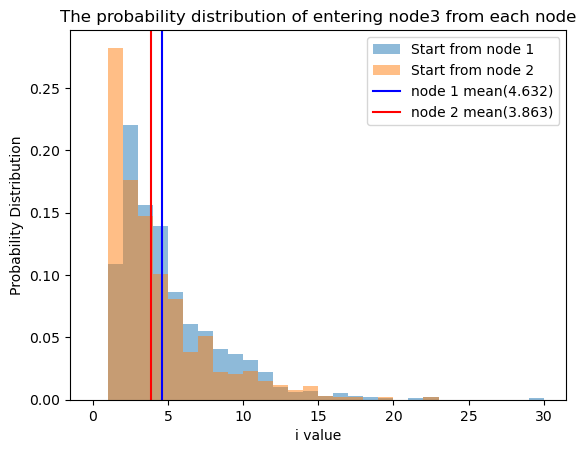

In [9]:
# make function to count the time that the process enters node 2
def time_count(start_node):
    '''
    return 1000-length list which contains the number of times 
    the Markov process takes to reach node 3 from the start node
    '''
    nodes = [0, 1, 2]
    result = []
    for _ in range(1000):
        x = start_node - 1
        count = 0
        while x != 2:
            x = np.random.choice(nodes, p = np.array(P[x]).tolist()[0])
            count += 1
        result.append(count)
    return result

# make samples
result_1 = time_count(1)
result_2 = time_count(2)

print('The distribution of node1 has a peak around 3, whereas the distribution of node2 is monotonically decreasing from around 2. \
Also, the mean is higher for node1 than for node2.')

plt.hist(result_1, label='Start from node 1', alpha=0.5, bins=30, range=(0, 30), density=True)
plt.hist(result_2, label='Start from node 2', alpha=0.5, bins=30, range=(0, 30), density=True)
plt.axvline(np.mean(result_1), color='b', label=f'node 1 mean({np.mean(result_1)})')
plt.axvline(np.mean(result_2), color='r', label=f'node 2 mean({np.mean(result_2)})')
plt.title('The probability distribution of entering node3 from each node')
plt.xlabel('i value')
plt.ylabel('Probability Distribution')
plt.legend()
plt.show()

# 3(b)

From the question, we should solve following equations.
$$
\begin{equation*}
    \begin{cases}
u_1 = 1 + 0.2u_1 + 0.7u_2 + 0.1u_3 \\
u_2 = 1 + 0.2u_1 + 0.5u_2 + 0.3u_3 \\
    \end{cases}
\;\;where\:u_3 = 0
\end{equation*}
$$
As a result, we get
$$
\begin{equation*}
    u_1 = \frac{60}{13} \simeq 4.62 \\
    u_2 = \frac{50}{13} \simeq 3.85 \\
\end{equation*}
$$

The answers are so close to the means of 3(a)